In [ ]:
import torch
from torch_geometric.nn import GCNConv

In [ ]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(32, 16)
        self.conv2 = GCNConv(16, 7)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)

        return torch.log_softmax(x, dim=1)

model = Net()

In [ ]:
x = torch.rand((100, 32))
edge_index = torch.randint(0, 100, (2, 1000))

In [ ]:
model(x, edge_index)

In [29]:
args = {'gnn_conv': 'GCNConv'} # 'GATConv', 'GATv2Conv', 'TransformerConv' 'GCNConv'

if args['gnn_conv'] == 'GATv2Conv':
    from torch_geometric.nn import GATv2Conv as gnnconv
    print(1)
elif args['gnn_conv'] == 'GATConv':
    from torch_geometric.nn import GATConv as gnnconv
    print(2)
elif args['gnn_conv'] == 'TransformerConv':
    from torch_geometric.nn import TransformerConv as gnnconv
    print(3)
elif args['gnn_conv'] == 'GCNConv':
    from torch_geometric.nn import GCNConv as gnnconv
    print(4)
gnn_conv = gnnconv
print(gnn_conv)

4
<class 'torch_geometric.nn.conv.gcn_conv.GCNConv'>


In [30]:
gnn = gnn_conv(128, 128, heads=4, concat=True, add_self_loops=False, dropout=0.0)

In [32]:
print(type(gnn))

<class 'torch_geometric.nn.conv.gcn_conv.GCNConv'>


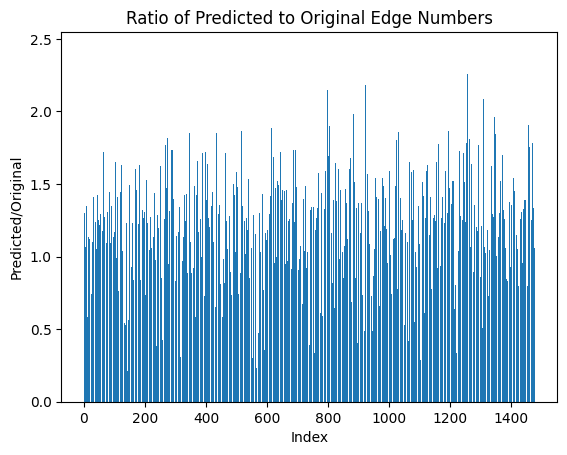

In [5]:
from math import e
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/xy/sim/')
# Parse the log file
ratios = []
with open('/home/xy/sim/logfile.log', 'r') as f:
    for line in f:
        if line == 'start evaluation\n':
            break
        elif line == 'ep 1\n' or line == 'start training\n':
            continue
        parts = line.split(',')
        original = int(parts[0].split(': ')[1])
        predicted = int(parts[1].split(': ')[1])
        ratio = predicted / original
        ratios.append(ratio)

# Plot the ratios
plt.bar(range(len(ratios)), ratios)
plt.xlabel('Index')
plt.ylabel('Predicted/Original')
plt.title('Ratio of Predicted to Original Edge Numbers')
plt.show()

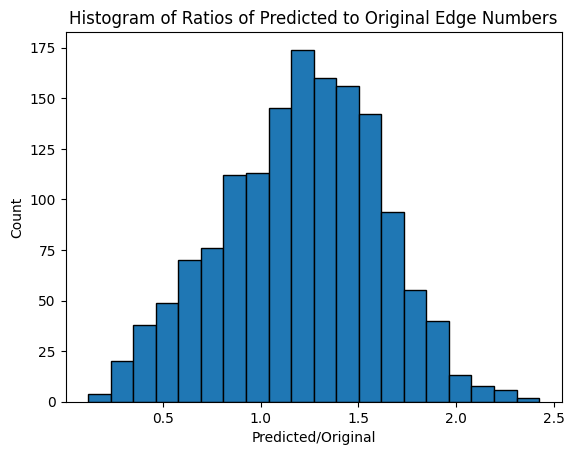

In [1]:
# Parse the log file
from math import e
import matplotlib.pyplot as plt
ratios = []
with open('/home/xy/sim/logfile.log', 'r') as f:
    for line in f:
        if line == 'start evaluation\n':
            break
        elif line == 'ep 1\n' or line == 'start training\n':
            continue
        parts = line.split(',')
        original = int(parts[0].split(': ')[1])
        predicted = int(parts[1].split(': ')[1])
        ratio = predicted / original
        ratios.append(ratio)

# Plot the histogram
plt.hist(ratios, bins=20, edgecolor='black')
plt.xlabel('Predicted/Original')
plt.ylabel('Count')
plt.title('Histogram of Ratios of Predicted to Original Edge Numbers')
plt.show()